<a href="https://colab.research.google.com/github/MatheusSC017/Studies/blob/main/BinaryTreeBuilder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Tree Builder
**This script creates a new tree based on an odd list with numbers and the letter "N", where each numeric value in the list indicates the presence of the node, if the value is "N" the node does not exist**

In [1]:
from networkx.drawing.nx_pydot import graphviz_layout
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
class Node:
  left_node = None
  right_node = None
  def __init__(self, key):
    self.key = key

class BuildBinaryTree:
  node_values = None
  layer = 0
  pointer = -1
  
  def build_tree(self, structure):
    values = structure.split(' ')
    self.node_values = [(values[i], values[i + 1]) for i in range(1, len(values), 2)]
    self.pointer = -1
    self.layer = 1

    self.root = Node(values[0])
    self.build_layer([self.root, ])
    return self.root

  def build_layer(self, nodes):
    new_nodes = list()
    for node in nodes:
      if node:    
        sub_nodes = self.build_node(node)
        if sub_nodes:
          new_nodes.extend(sub_nodes)
    if any(new_nodes):
      self.build_layer(new_nodes)

  def build_node(self, node):
    self.pointer += 1
    if self.pointer < len(self.node_values):
      sub_node_values = self.node_values[self.pointer]

      if sub_node_values[0] != 'N':
        node.left_node = Node(sub_node_values[0])
        
      if sub_node_values[1] != 'N':
        node.right_node = Node(sub_node_values[1])

      return (node.left_node, node.right_node)

def print_tree(tree):
  def print_node(root, prev=None, color=None):
    if root:
      G.add_node(root.key)
      if prev:
        G.add_edge(prev, root.key, color=color)
      print_node(root.left_node, root.key, '#00FF00')
      print_node(root.right_node, root.key, '#FF0000')
  plt.figure(1, figsize=(20, 8))
  G = nx.Graph()
  print_node(tree)
  pos = graphviz_layout(G, prog='dot')
  colors = [G[u][v]['color'] for u,v in G.edges()]
  nx.draw(G, pos, with_labels=True, node_size=1000, edge_color=colors)
  plt.show()

In [3]:
build_binary_tree = BuildBinaryTree()
binary_tree = build_binary_tree.build_tree('50 22 75 25 N 66 90 N N N 72 88 100 69 74 86 89 95 N')

<ipython-input-2-e8cbff4d9255>:56: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog='dot')


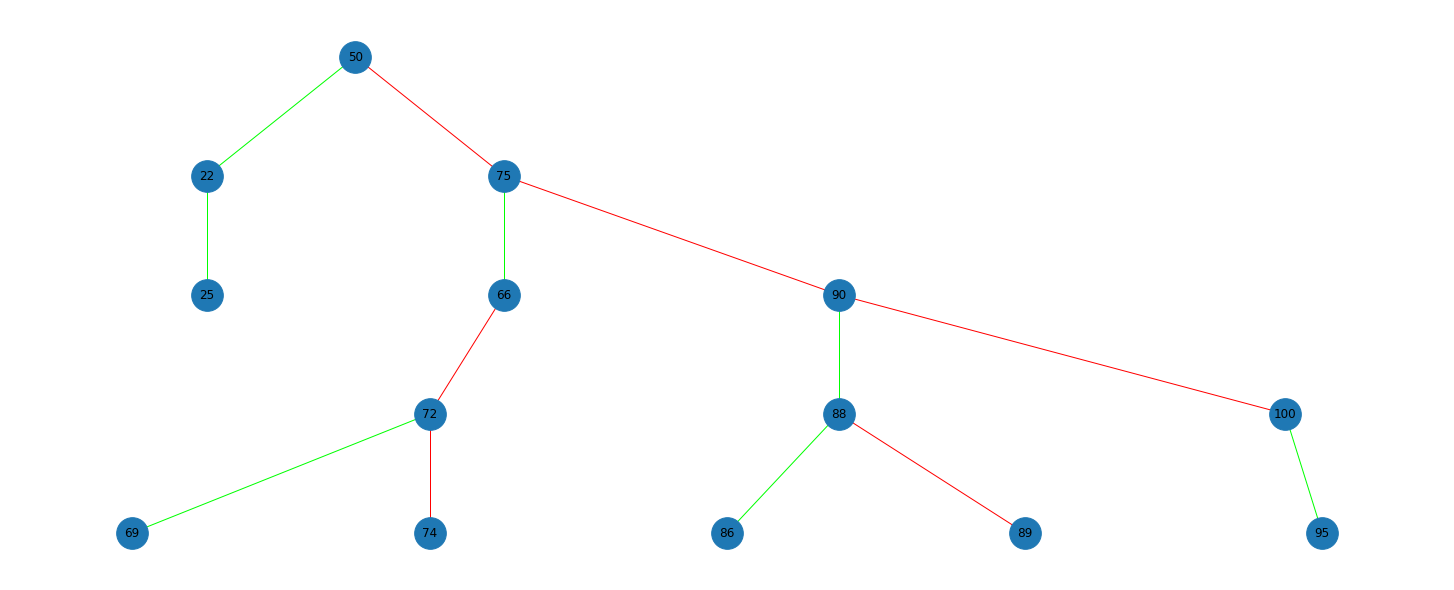

In [4]:
print_tree(binary_tree)

# Converting a Binary Tree to a Binary Search Tree

In [5]:
build_binary_tree = BuildBinaryTree()
binary_tree = build_binary_tree.build_tree('50 22 75 25 N 66 90 N N N 72 88 100 69 74 86 89 95 N')

In [6]:
def get_values(tree):
  if tree:
    yield int(tree.key)
    yield from get_values(tree.left_node)
    yield from get_values(tree.right_node)

In [19]:
def create_node_with_ordered_list(ordered_values):
  """ Creates a node with ordered list, returning the node and two sublists with values lesser and greater than the node respectively """
  if ordered_values:
    median = (len(ordered_values) // 2) 
    return Node(ordered_values[median]), ordered_values[:median], ordered_values[median + 1:]

def set_subnode(root, ordered_values, side):
  """ Set the subnode attributes such as key value and left/right subnode values """
  if ordered_values:
    subnode, less_than_list, greater_than_list = create_node_with_ordered_list(ordered_values)
    setattr(root, side, subnode)
    create_subnodes_with_ordered_lists(subnode, less_than_list, greater_than_list)

def create_subnodes_with_ordered_lists(root, left_ordered_values, right_ordered_values):
  """ Request the setting of left / right subnodes """
  set_subnode(root, left_ordered_values, 'left_node')
  set_subnode(root, right_ordered_values, 'right_node')

def convert_to_binary_search_tree(tree):
  """ Convert a binary tree to a binary search tree """
  ordered_values = sorted(list(get_values(tree)))
  root, less_than_list, greater_than_list = create_node_with_ordered_list(ordered_values)

  create_subnodes_with_ordered_lists(root, less_than_list, greater_than_list)
  return root


In [20]:
binary_search_tree = convert_to_binary_search_tree(binary_tree)

<ipython-input-2-e8cbff4d9255>:56: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog='dot')


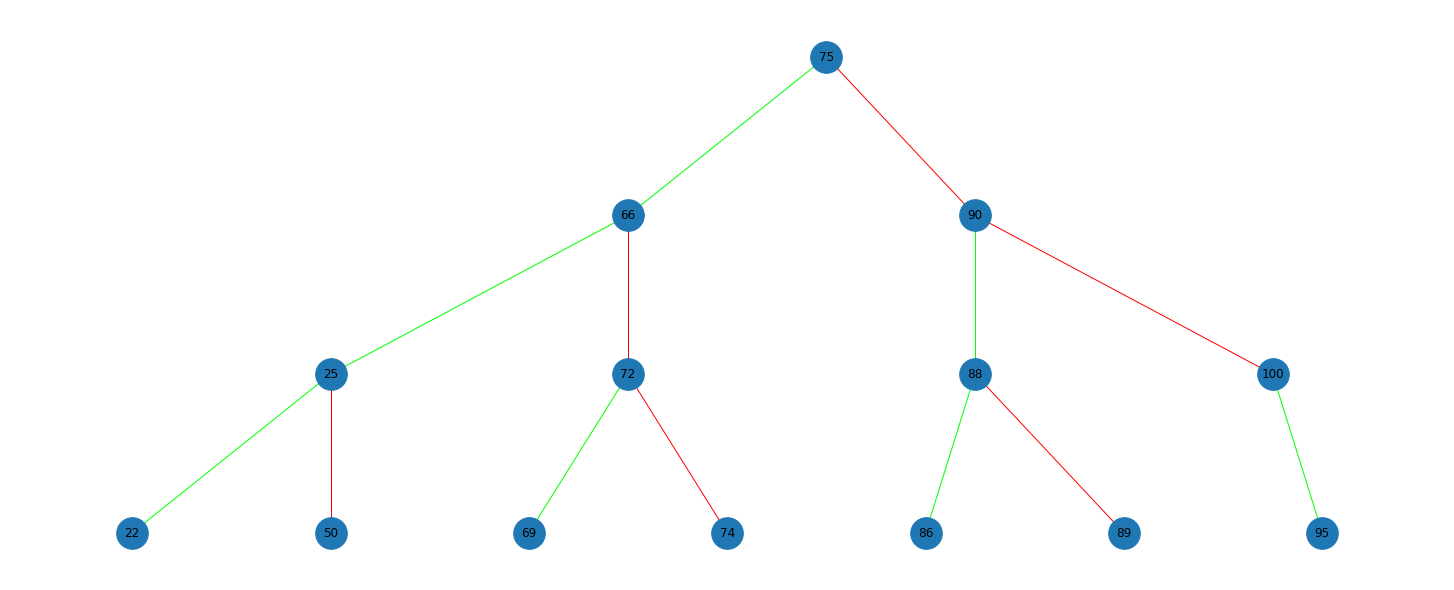

In [21]:
print_tree(binary_search_tree)